In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.shape

(13320, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
********************
siz

In [ ]:
data.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
data.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
data['location'] = data['location'].fillna('Sarjapur Road')
data['size'] = data['size'].fillna('2 BHK')
data['bath'] = data['bath'].fillna(data['bath'].median())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [ ]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
def convert_range(x):
    if isinstance(x, str):
        temp = x.split('-')
        if len(temp) == 2:
            return (float(temp[0]) + float(temp[1])) / 2
        try:
            return float(x)
        except:
            return None
    return x

data['total_sqft'] = data['total_sqft'].apply(convert_range)
data.dropna(subset=['total_sqft'], inplace=True)
print("Cleaned 'total_sqft' column.")

Cleaned 'total_sqft' column.


In [ ]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']
print("Created 'price_per_sqft' column.")
data.head()

Created 'price_per_sqft' column.


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
# Cell 7: Reduce location categories by grouping rare ones into "other"
location_counts = data['location'].value_counts()
locations_less_than_10 = location_counts[location_counts <= 10].index
data['location'] = data['location'].apply(lambda x: 'other' if x in locations_less_than_10 else x)

print(f"Number of unique locations reduced to: {data['location'].nunique()}")

Number of unique locations reduced to: 241


In [ ]:
data['location'].value_counts()

,count
location,
other,2892
Whitefield,538
Sarjapur Road,399
Electronic City,302
Kanakpura Road,271
...,...
2nd Phase Judicial Layout,11
Marsur,11
Bommenahalli,11


In [ ]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04
mean,1559.626694,2.687359,112.453654,2.801718,7.907501e+03
std,1238.405258,1.336158,149.070368,1.291591,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
def remove_outliers_sqft(df_in):
    df_out = pd.DataFrame()
    for key, subdf in df_in.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, gen_df], ignore_index=True)
    return df_out

data = remove_outliers_sqft(data)
print("Outliers removed based on price_per_sqft.")

Outliers removed based on price_per_sqft.


In [ ]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000
mean,1537.808470,2.605444,105.231407,2.719628,6305.040962
std,1145.476751,1.208370,138.461704,1.153699,3637.224906
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,50.000000,2.000000,4285.714286
50%,1280.000000,2.000000,70.000000,3.000000,5314.009662
75%,1660.000000,3.000000,110.000000,3.000000,6853.176014
max,52272.000000,27.000000,3600.000000,27.000000,53150.000000


In [ ]:
# Removing outliers based on BHK
def bhk_outlier_remover(df_in):
    exclude_indices = np.array([])
    for location, location_df in df_in.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {'mean': np.mean(bhk_df.price_per_sqft), 'count': bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df_in.drop(exclude_indices, axis='index')

data = bhk_outlier_remover(data)
print("Outliers removed based on BHK.")

Outliers removed based on BHK.


In [ ]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,8049.000000,8049.000000,8049.000000,8049.000000,8049.000000
mean,1517.307548,2.586657,117.390533,2.648900,6970.219302
std,907.516575,1.244062,156.289840,1.184716,4035.516624
min,250.000000,1.000000,8.000000,1.000000,1300.000000
25%,1080.000000,2.000000,51.000000,2.000000,4676.666667
50%,1255.000000,2.000000,76.300000,2.000000,5894.627021
75%,1691.000000,3.000000,125.000000,3.000000,7500.000000
max,12000.000000,27.000000,3600.000000,27.000000,53150.000000


In [ ]:
#Final cleanup before modeling
data = data[data.bath < data.bhk + 2] # Remove properties with bathrooms > bhk+2
data.drop(columns=['size', 'price_per_sqft'], inplace=True) # Drop temporary columns

print("Final dataset shape for modeling:", data.shape)
data.head()

Final dataset shape for modeling: (7947, 5)


,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [ ]:
data

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
...,...,...,...,...,...
11490,other,1400.0,7.0,218.0,7
11493,other,1353.0,2.0,110.0,2
11494,other,812.0,1.0,26.0,1
11497,other,1200.0,5.0,325.0,4


In [ ]:
#Prepare data and split for training and testing
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split complete. Training set has {X_train.shape[0]} samples.")

Data split complete. Training set has 6357 samples.


In [ ]:
#Build the full ML pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import xgboost as xgb

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['location']),
    remainder='passthrough'
)

pipeline = make_pipeline(
    preprocessor,
    StandardScaler(),
    xgb.XGBRegressor(objective='reg:squarederror')
)

In [ ]:
#Set up and run GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgbregressor__n_estimators': [100, 200],
    'xgbregressor__learning_rate': [0.05, 0.1],
    'xgbregressor__max_depth': [3, 5]
}

print("Starting hyperparameter tuning... (This may take a few minutes)")
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\nTuning complete!")

Starting hyperparameter tuning... (This may take a few minutes)
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Tuning complete!


In [ ]:
#Evaluating the best model from the grid search
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("--- Model Evaluation ---")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nR-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} Lakhs")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Lakhs")

--- Model Evaluation ---

R-squared (R²): 0.8152
Mean Absolute Error (MAE): 26.75 Lakhs
Root Mean Squared Error (RMSE): 69.87 Lakhs


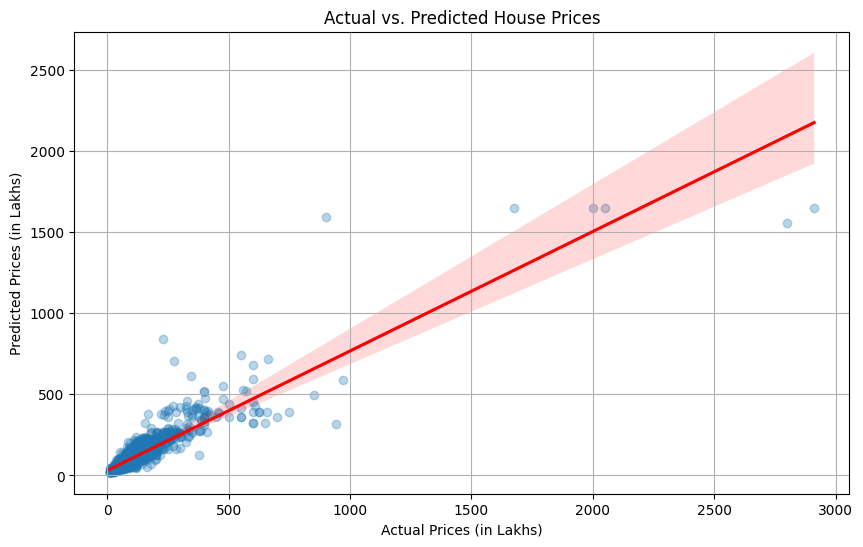

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Prices (in Lakhs)")
plt.ylabel("Predicted Prices (in Lakhs)")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()

In [ ]:
#Save the best model to a file
import pickle

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully as 'xgb_model.pkl'!")

Model saved successfully as 'xgb_model.pkl'!
